   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

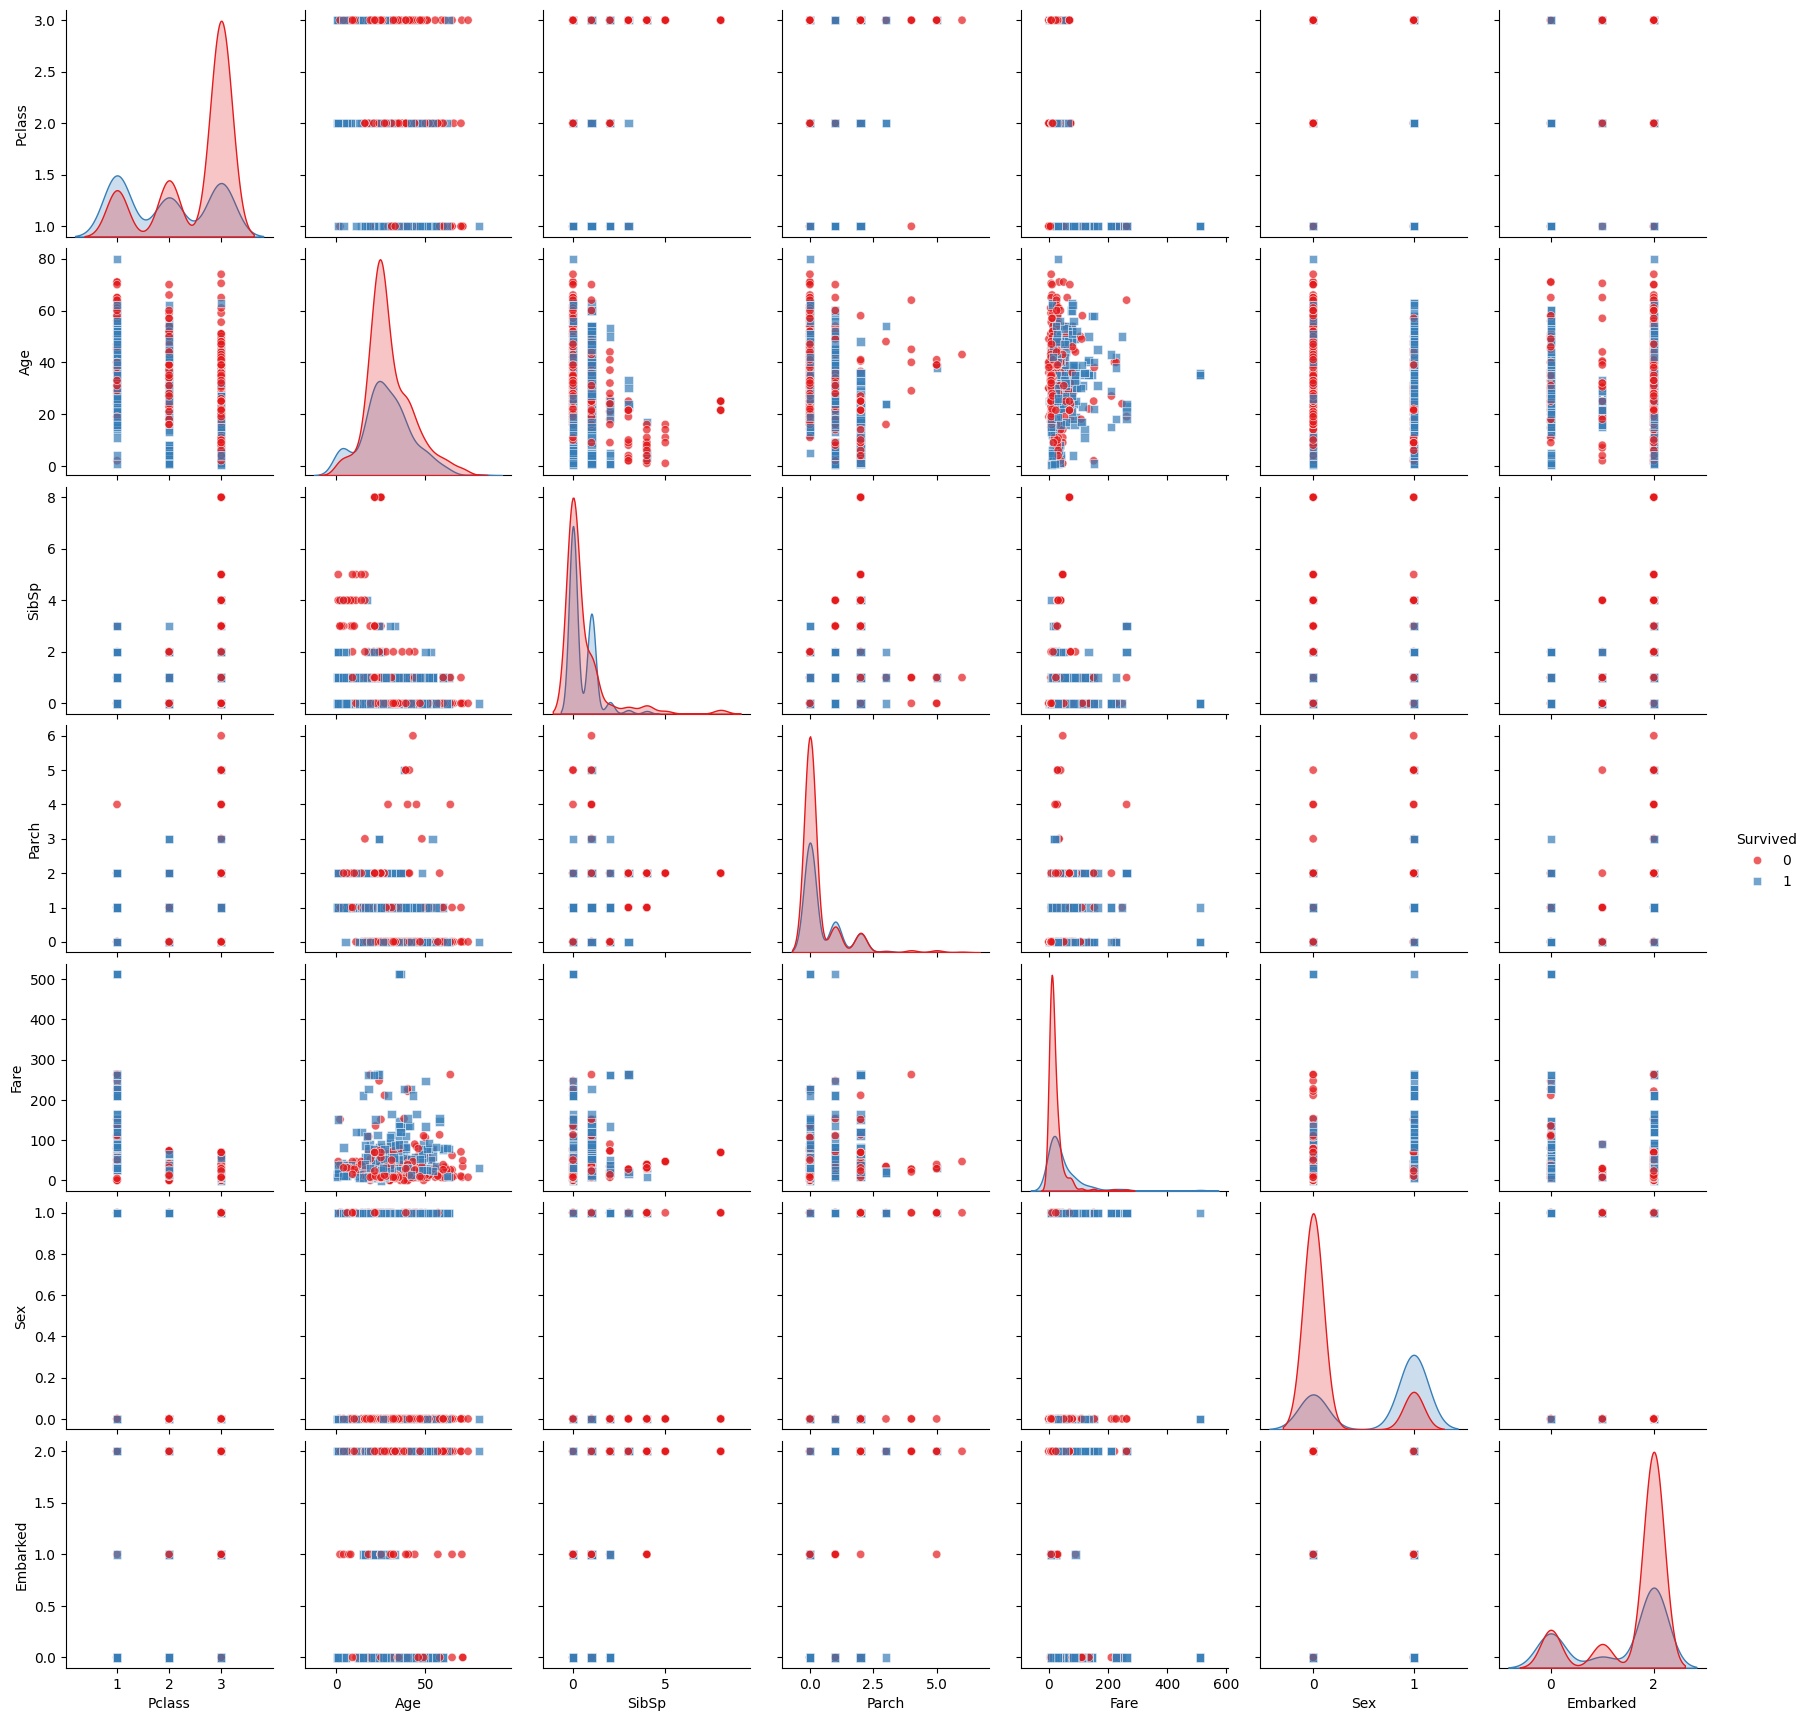

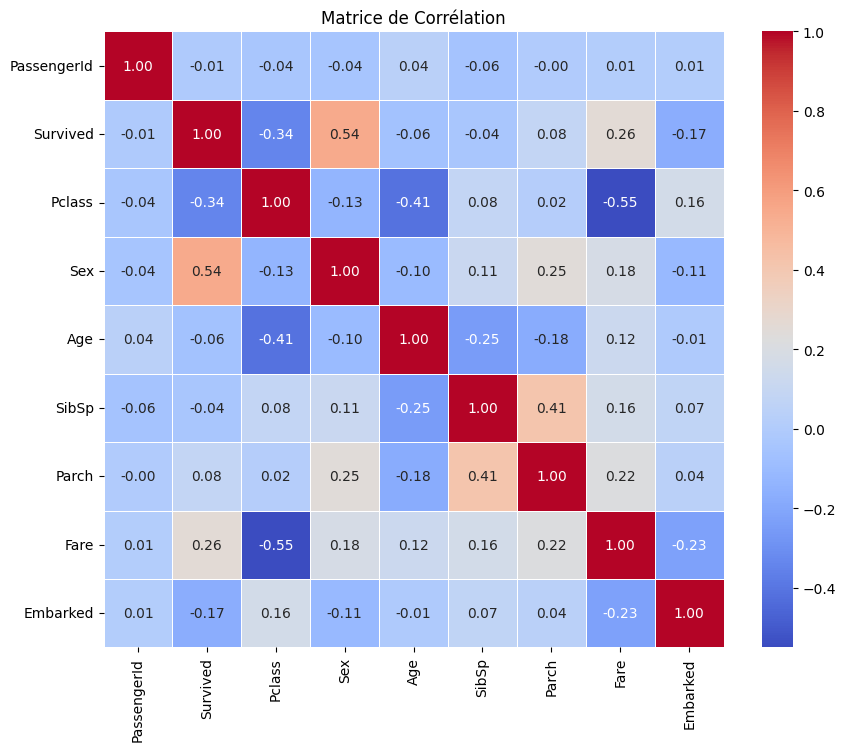

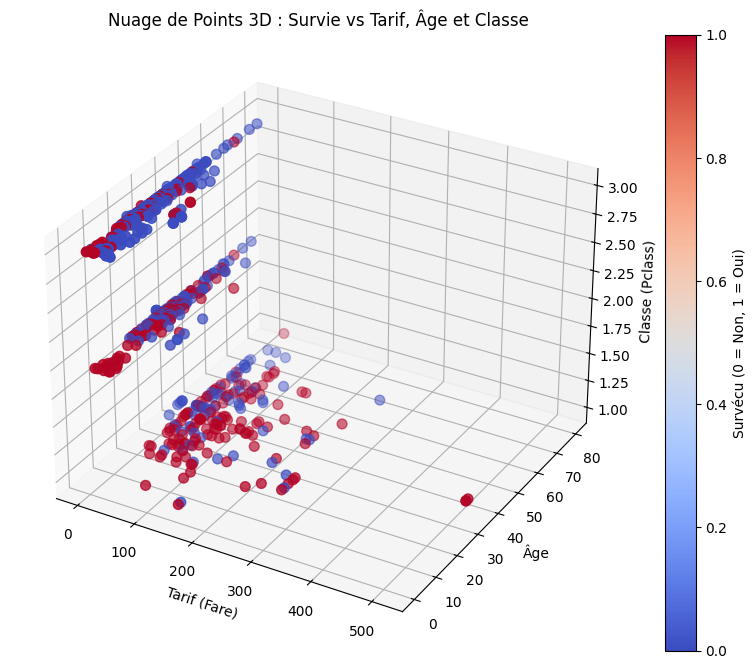

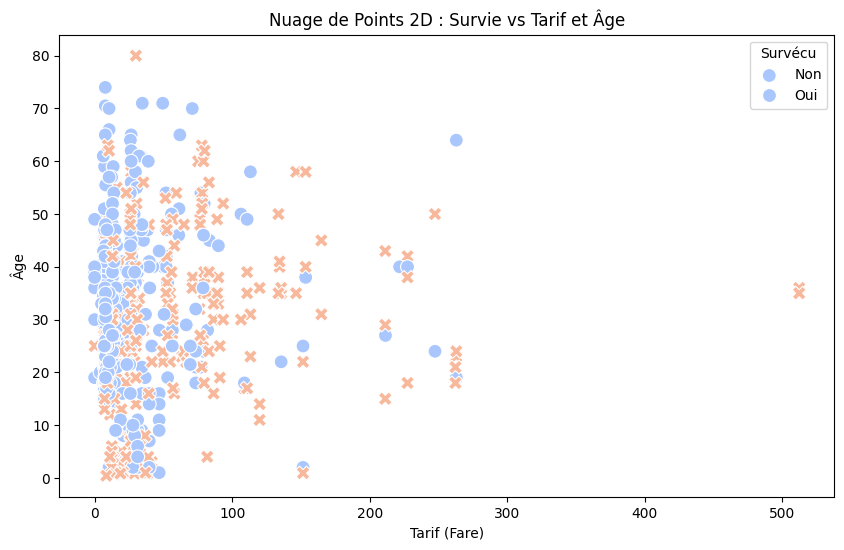

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Classification Report (Fold):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.69      0.72      0.70        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

AUC (Fold): 0.8263835263835264

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classification Report (Fold):
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       111
           1       0.69      0.55      0.61        67

    accuracy                           0.74       178
   macro avg       0.72      0.70      0.71       178
weighted avg       0.73      0.74      0.73       178

AUC (Fold): 0.7953475863923625

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report (Fold):
              precision    recall  f1-score   support

           0       0.87

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Ajoute cette ligne en haut pour importer SimpleImputer

# Charger le jeu de données
data = pd.read_csv('train.csv')

# Vérifier les premières lignes et les informations sur les données
print(data.head())
print(data.info())

# Convertir 'Sex' et 'Embarked' en format numérique (si ce n'est pas déjà fait)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Imputer les valeurs manquantes de la colonne Âge en utilisant la médiane par groupe (classe et sexe)
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Vérifier que toutes les valeurs manquantes d'Âge ont été remplacées
print(data['Age'].isnull().sum())  # Devrait être 0 si tout est correct


# Créer un pairplot en fonction de la variable 'Survived' avec 'hue'
sns.pairplot(data, 
             vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'],  # Colonnes numériques et pertinentes
             hue='Survived',  # Colorier en fonction de la survie
             palette='Set1',  # Choisir une palette de couleurs distinctes
             markers=["o", "s"],  # Différencier les points pour les survivants et non-survivants
             diag_kind='kde',  # Afficher des courbes de densité sur la diagonale
             plot_kws={'alpha': 0.7})  # Ajouter de la transparence aux points pour mieux voir les superpositions

# Afficher le graphique
plt.show()

# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Créer un heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajouter un titre
plt.title('Matrice de Corrélation')

# Afficher le graphique
plt.show()

# Créer la figure pour le graphique 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraire les données à afficher
x = data['Fare']  # Tarifs des passagers
y = data['Age']   # Âge des passagers
z = data['Pclass']  # Classe des passagers

# Créer le nuage de points 3D avec la couleur selon 'Survived'
sc = ax.scatter(x, y, z, c=data['Survived'], cmap='coolwarm', s=50, marker='o')

# Ajouter des titres et des étiquettes
ax.set_title('Nuage de Points 3D : Survie vs Tarif, Âge et Classe')
ax.set_xlabel('Tarif (Fare)')
ax.set_ylabel('Âge')
ax.set_zlabel('Classe (Pclass)')

# Ajouter une légende de couleurs pour la variable 'Survived'
plt.colorbar(sc, label='Survécu (0 = Non, 1 = Oui)')

# Afficher le graphique
plt.show()

# Créer un nuage de points 2D entre 'Fare' et 'Age' avec la couleur en fonction de 'Survived'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Fare', y='Age', hue='Survived', palette='coolwarm', style='Survived', markers=['o', 'X'], s=100)
plt.title('Nuage de Points 2D : Survie vs Tarif et Âge')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Âge')
plt.legend(title='Survécu', labels=['Non', 'Oui'])
plt.show()
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder

# Fonction pour créer le modèle de réseau de neurones
def create_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),                  
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Préparation du préprocesseur
def create_preprocessor():
    numeric_features = ['Age', 'Fare']
    categorical_features = ['Sex', 'Embarked']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])
    return preprocessor

# Charger les données d'entraînement
data = pd.read_csv('train.csv')

# Pré-traitement des colonnes inutiles et valeurs manquantes
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
imputer = SimpleImputer(strategy='median')
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])
X = data.drop(columns=['Survived'])
y = data['Survived']

# Création du préprocesseur et transformation des données d'entraînement
preprocessor = create_preprocessor()
X_processed = preprocessor.fit_transform(X)

# Cross-validation K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
roc_auc_scores = []

# Boucle de cross-validation
for train_index, val_index in kf.split(X_processed):
    X_train, X_val = X_processed[train_index], X_processed[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Création et entraînement du modèle
    model = create_model(X_train.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Prédictions sur l'ensemble de validation
    y_pred_prob = model.predict(X_val).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)
    cv_scores.append(accuracy)
    roc_auc_scores.append(auc)
    
    # Affichage du rapport de classification pour chaque fold
    print(f'Classification Report (Fold):\n{classification_report(y_val, y_pred)}')
    print(f'AUC (Fold): {auc}\n')

# Sauvegarde du modèle final
model.save('mon_modele.keras')

# Afficher les résultats de validation moyenne
print(f'Moyenne de l\'accuracy : {np.mean(cv_scores)}')
print(f'Écart-type de l\'accuracy : {np.std(cv_scores)}')
print(f'Moyenne de l\'AUC : {np.mean(roc_auc_scores)}')
print(f'Écart-type de l\'AUC : {np.std(roc_auc_scores)}')


# === Prédiction sur les données de test ===

# Charger et prétraiter les données de test
def load_and_preprocess_test_data(test_file_path, preprocessor):
    test_data = pd.read_csv(test_file_path)
    passenger_ids = test_data['PassengerId']
    
    test_data = test_data.drop(columns=['Name', 'Ticket', 'Cabin'])
    imputer = SimpleImputer(strategy='median')
    test_data[['Age', 'Fare']] = imputer.fit_transform(test_data[['Age', 'Fare']])
    
    X_test = test_data.drop(columns=['Survived'], errors='ignore')
    X_test_processed = preprocessor.transform(X_test)
    
    return X_test_processed, passenger_ids

# Charger le modèle et prétraiter les données de test
X_test_scaled, passenger_ids = load_and_preprocess_test_data('test.csv', preprocessor)

# Effectuer des prédictions sur les données de test
y_pred_prob_test = model.predict(X_test_scaled).flatten()
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

# Générer le fichier de prédictions
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_pred_test})
output.to_csv('predictions.csv', index=False)

# Afficher un aperçu des résultats
print(output.head())

